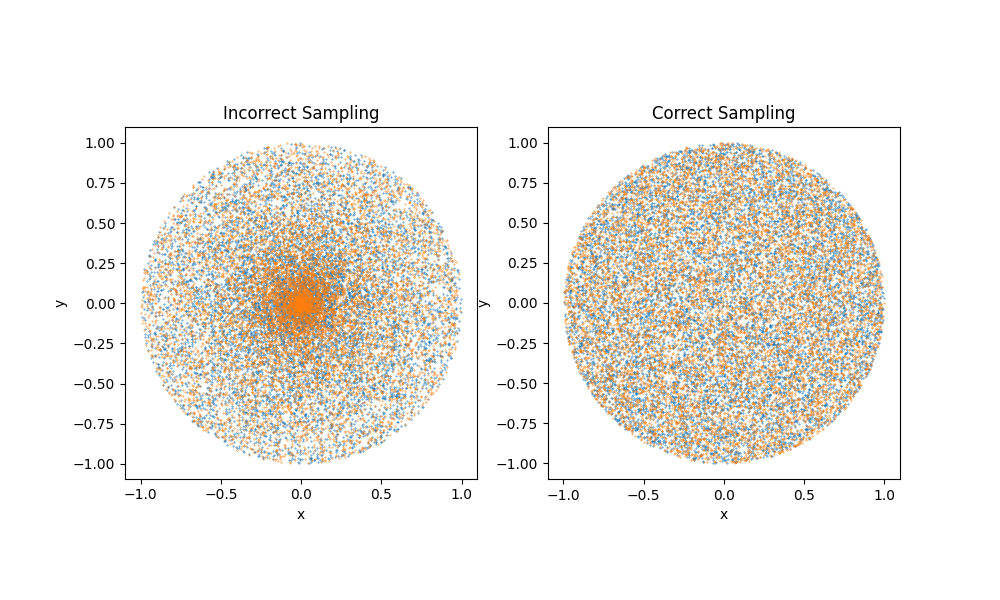

In [2]:
"""surface_sampling_circle.py"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
from matplotlib.markers import MarkerStyle

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def plot_incorrect(ax: Axes) -> None:
    """ This function plots random samples within a circle without taking into account the radius is not uniformly distributed """
    num_samples = 10_000

    v: NDArray[np.float_] = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    r: NDArray[np.float_] = random.rand(num_samples)

    x: NDArray[np.float_] = r * np.cos(v)
    y: NDArray[np.float_] = r * np.sin(v)

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, marker=MarkerStyle("."), s=pixel_size)

    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal")


def plot_correct(ax: Axes) -> None:
      """ This function plots random samples within a circle taking into account the radius not being uniformly distributed """
    num_samples = 10_000

    v: NDArray[np.float_] = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle

    # To fix to a uniform distribution, need the square root of the random number samples. 
    # https://www.anderswallin.net/2009/05/uniform-random-points-in-a-circle-using-polar-coordinates/
    # The square root makes the difference because it is found using the inverse of the CDF. The CDF finds the probability distribution of random variables
    # https://www.cs.cornell.edu/courses/cs6630/2015fa/notes/pdf-transform.pdf
    r: NDArray[np.float_] = np.sqrt(random.rand(num_samples))

    x: NDArray[np.float_] = r * np.cos(v)
    y: NDArray[np.float_] = r * np.sin(v)

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, marker=MarkerStyle("."), s=pixel_size)

    # Customizing the plot
    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal")


def main() -> None:
    plt.figure(" ", figsize=(10, 6))
    plot_incorrect(plt.subplot(121))
    plot_correct(plt.subplot(122))
    plt.show()


main()